In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Clean_dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('flight',axis=1)
df['class'] = df['class'].apply(lambda x: 1 if x=='buisness' else 0)

In [12]:
df.stops = pd.factorize(df.stops)[0]

In [13]:
df = df.join(pd.get_dummies(df.airline,prefix='airline',dtype=int)).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city,prefix='source_city',dtype=int)).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city,prefix='destination_city',dtype=int)).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.arrival_time,prefix='arrival_time',dtype=int)).drop('arrival_time',axis=1)
df = df.join(pd.get_dummies(df.departure_time,prefix='departure_time',dtype=int)).drop('departure_time',axis=1)

In [14]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,0,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,0,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,0,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,0,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [15]:
# Training regression model

In [16]:
from  sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop('price',axis=1)
y = df.price

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [19]:
reg.score(X_test,y_test)

-0.3268407387960872

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

In [21]:
y_pred = reg.predict(X_test)
print(f"R2 score: {r2_score(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")


R2 score: -0.3268407387960872
MAE: 19000.403215833052
MSE: 683962880.6984097
RMSE: 26152.684005631425


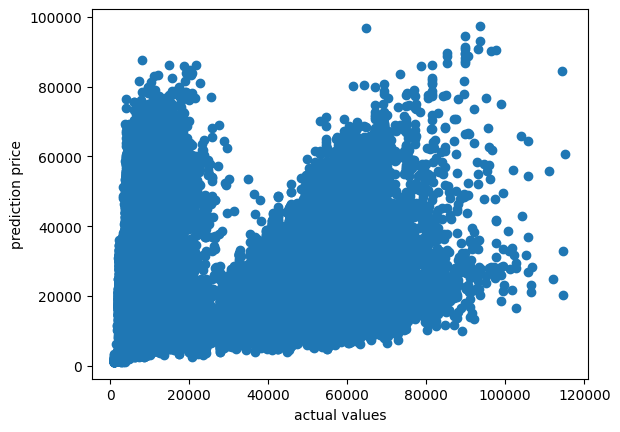

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual values')
plt.ylabel('prediction price')
plt.show()

In [23]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [24]:
important_featurs = {}
for idx,val in enumerate(reg.feature_importances_):
    important_featurs[idx]  = val

important_featurs = sorted(important_featurs,key=important_featurs.get,
                           reverse=True)
print(f"Most import features: {important_featurs[:5]}")

Most import features: [3, 2, 9, 5, 0]


In [25]:
important = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_important = sorted(important.items(),key=lambda x: x[1],reverse=True)
important

{'stops': 0.014057522378856623,
 'class': 0.0,
 'duration': 0.2102776184936089,
 'days_left': 0.30026803286194764,
 'airline_AirAsia': 0.00026484863339407025,
 'airline_Air_India': 0.12440372836378556,
 'airline_GO_FIRST': 5.60163350109908e-05,
 'airline_Indigo': 0.00020519858872911228,
 'airline_SpiceJet': 4.313450910848341e-05,
 'airline_Vistara': 0.17479025759340736,
 'source_city_Bangalore': 0.008053815692272153,
 'source_city_Chennai': 0.007404457177438397,
 'source_city_Delhi': 0.01019840694521566,
 'source_city_Hyderabad': 0.005991016270893873,
 'source_city_Kolkata': 0.008966294018045882,
 'source_city_Mumbai': 0.009672659687390997,
 'destination_city_Bangalore': 0.00793680499340577,
 'destination_city_Chennai': 0.008598318626198823,
 'destination_city_Delhi': 0.00760266407177833,
 'destination_city_Hyderabad': 0.007092527219852655,
 'destination_city_Kolkata': 0.006892616398945657,
 'destination_city_Mumbai': 0.010483047231694092,
 'arrival_time_Afternoon': 0.00514808520811876

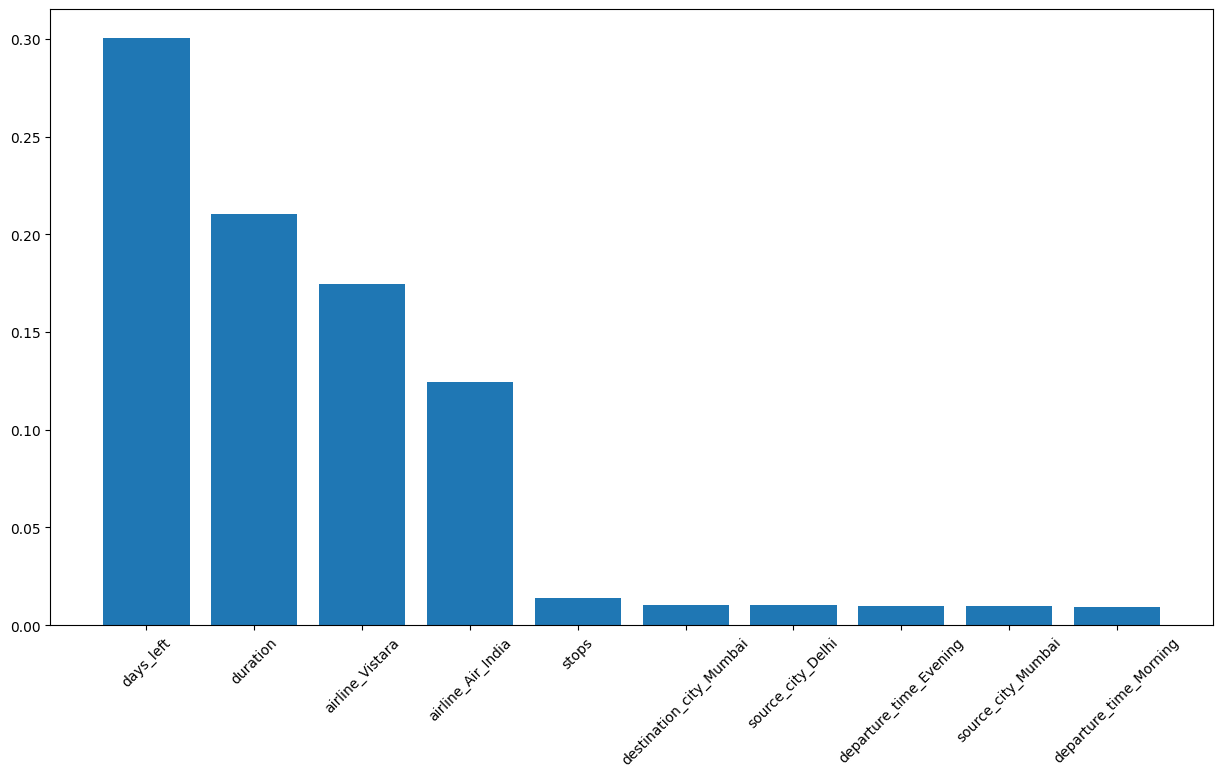

In [26]:
plt.figure(figsize=(15,8))
plt.bar([x[0] for x in sorted_important[:10]],[x[1] for x in sorted_important [:10]])
plt.xticks(rotation = 45)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
}

grid_search = GridSearchCV(reg,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_param = grid_search.best_params_

In [2]:
'''from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

param_dist = {
    'n_estimators' : randint(100,300),
    'max_depth':[None,10,20,30],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5),
    'max_features':[None,'auto','sqrt']
}

random_search = RandomizedSearchCV(reg,param_distributions=param_dist,n_iter=2,cv=3,
                                   scoring='neg_mean_squared_error',verbose=2,random_state=10,n_jobs=-1)
random_search.fit(X_train,y_train)



'''

"from sklearn.model_selection import RandomizedSearchCV\n\nfrom scipy.stats import randint\n\nparam_dist = {\n    'n_estimators' : randint(100,300),\n    'max_depth':[None,10,20,30],\n    'min_samples_split':randint(2,11),\n    'min_samples_leaf':randint(1,5),\n    'max_features':[None,'auto','sqrt']\n}\n\nrandom_search = RandomizedSearchCV(reg,param_distributions=param_dist,n_iter=2,cv=3,\n                                   scoring='neg_mean_squared_error',verbose=2,random_state=10,n_jobs=-1)\nrandom_search.fit(X_train,y_train)\n\n\n\n"

In [3]:
best_param_1 = best_param.best_estimator_

NameError: name 'best_param' is not defined